In [24]:
import pandas as pd
import csv
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline  
import pylab
import os
import glob
import statsmodels.api as sm

In [6]:
path = "/Users/Dani/Downloads/appeals-tax-2012.csv"
df = pd.read_csv(path,index_col=None, header=0)

In [9]:
# split by classification
df["%_rev"] = df["total_rev"] / df["proppose_av"]
df["class_type"] = df["classification"].apply(lambda x: str(x)[0])
df_2_5 = df[(df["class_type"] == "2") | (df["class_type"] == "5")]
df_2 = df[(df["class_type"] == "2")]
df_5 = df[(df["class_type"] == "5")]

In [18]:
has_lawyer = df_2['self_represent'].value_counts()[0]
self_represent = df_2['self_represent'].value_counts()[1]

265999

In [20]:
## residential total rev 
df_2.groupby(['self_represent']).mean()['total_rev'] #/ df_2.shape[0] #/ df_2['self_represent'].value_counts()

self_represent
0    0.013405
1    0.014251
Name: total_rev, dtype: float64

In [12]:
df_2.groupby(['self_represent']).mean()['%_rev']

self_represent
0    0.053806
1    0.159839
Name: %_rev, dtype: float64

In [21]:
cols = ["total_rev", "%_rev", "proppose_av", "win"]
df_2.groupby(['self_represent']).describe()[cols]
#.transform(lambda x: x/sum(x))

total_rev          %_rev      proppose_av  \
self_represent                                                         
0              count   265999.000000  265999.000000    265999.000000   
               mean      3566.703830       0.053806     25797.958992   
               std      22874.970044      29.460435     74237.615004   
               min    -455366.000000  -12335.500000         1.000000   
               25%        392.000000       0.056408      7988.000000   
               50%       1775.000000       0.114605     18263.000000   
               75%       3667.000000       0.199987     30947.500000   
               max    6583193.000000       0.999984  16660000.000000   
1              count       73.000000      73.000000        73.000000   
               mean      3791.767123       0.159839     32118.191781   
               std       6459.441614       0.235956     36741.885560   
               min          0.000000       0.000000       443.000000   
               25%          0.000000       0.000000      8131.000000   
               50%       2113.000000       0.057706     18889.000000   
               75%       4460.000000       0.200025     39744.000000   
               max      40541.000000       0.846128    175541.000000   

                                win  
self_represent                       
0              count  265999.000000  
               mean        0.864917  
               std         0.341813  
               min         0.000000  
               25%         1.000000  
               50%         1.000000  
               75%         1.000000  
               max         1.000000  
1              count      73.000000  
               mean        0.616438  
               std         0.489618  
               min         0.000000  
               25%         0.000000  
               50%         1.000000  
               75%         1.000000  
               max         1.000000

In [22]:
pd.crosstab([df_2.self_represent], df_2.win,  margins=True)

win,0,1,All
self_represent,,,
0,35932,230067,265999
1,28,45,73
All,35960,230112,266072


In [30]:
cols = ["total_rev", "%_rev", "proppose_av", "win"]
df_5.groupby(['self_represent']).describe()[cols]

total_rev         %_rev   proppose_av  \
self_represent                                                      
0              count     45343.000000  45343.000000  4.534300e+04   
               mean      98470.400040      0.245654  3.552963e+05   
               std      596420.096333      0.226061  2.334136e+06   
               min    -3395551.000000     -2.199778  1.000000e+00   
               25%         349.000000      0.029427  2.124000e+04   
               50%       10310.000000      0.210326  5.785700e+04   
               75%       43504.000000      0.394108  1.608080e+05   
               max    30756282.000000      1.000000  1.604496e+08   
1              count        57.000000     57.000000  5.700000e+01   
               mean     172894.385965      0.305613  5.832415e+05   
               std      284003.046302      0.216684  7.211765e+05   
               min           0.000000      0.000000  1.001000e+04   
               25%       18941.000000      0.157248  1.262100e+05   
               50%       84337.000000      0.258024  2.696430e+05   
               75%      155384.000000      0.493329  7.669650e+05   
               max     1403520.000000      0.772864  3.930151e+06   

                               win  
self_represent                      
0              count  45343.000000  
               mean       0.813224  
               std        0.389736  
               min        0.000000  
               25%        1.000000  
               50%        1.000000  
               75%        1.000000  
               max        1.000000  
1              count     57.000000  
               mean       0.912281  
               std        0.285401  
               min        0.000000  
               25%        1.000000  
               50%        1.000000  
               75%        1.000000  
               max        1.000000

In [31]:
pd.crosstab([df_5.self_represent], df_5.win,  margins=True)

win,0,1,All
self_represent,,,
0,8469,36874,45343
1,5,52,57
All,8474,36926,45400


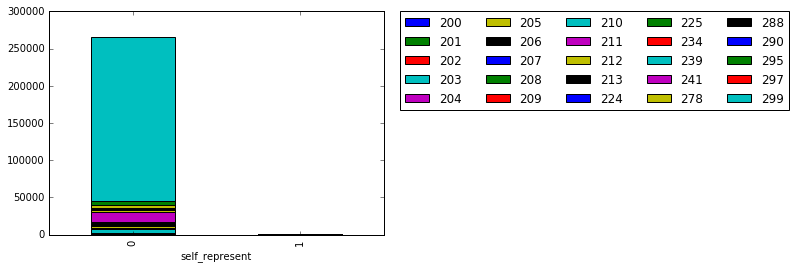

In [25]:
df_2.groupby(['self_represent','classification']).size().unstack().plot(kind = "bar", stacked=True)
lgd = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 5)
#plt.tight_layout()
#plt.savefig(os.getcwd() + "/results/appeals-condo.png", bbox_extra_artists=(lgd,), bbox_inches='tight')



In [14]:
for i in df.columns:
    print i

Unnamed: 0
Unnamed: 0.1
pin
taxyear
appealnum
attorneytaxrep
prioir_av
proppose_av
assr_final
board_av
housenum
dir
street_name
street_suffix
city_name
zip
area
subarea
ass_win
bor_win
bor_rev
assr_rev
total_rev
classification
win
clean_name
PIN_pretty
X
SegmentCode
PIN
Volume
Classification
TaxpayerName
TaxpayerMailingAddress
TaxpayerMailingCity
TaxpayerMailingState
TaxpayerMailingZip
TaxpayerPropertyHouse
TaxpayerPropertyDirection
TaxpayerPropertyStreet
TaxpayerPropertySuffix
TaxpayerPropertyCity
TaxpayerPropertyState
TaxpayerPropertyZip
TaxpayerPropertyTown
TaxCode
TaxStatus
HomeownerExempt
SeniorExempt
SeniorFreezeExempt
LongtimeHomeownersExempt
TaxInfoType
TaxType
TaxYear
BillYear
AccountStatus
BillType
SegmentCode2
InstallmentNumber1
AdjustedAmountDue1
TaxAmountDue1
RefundTaxAmountDueIndicator1
InterestAmountDue1
RefundInterestDueIndicator1
CostAmountDue1
RefundCostDueIndicator1
TotalAmountDue1
RefundTotalDueIndicator1
LastPaymentDate1
LastPaymentSource1
InstallmentNumber2
Origin